In [54]:
import math
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import requests
import io
from scipy.stats import norm
import LabMethods

In [100]:
univWashCPM = pd.read_csv('uw.csv')
univWashAQ = pd.read_csv('uw_aq.csv')
univWashWeather = pd.read_csv('uw_weather.csv')
univWashCsI = pd.read_csv('uw_d3s.csv.crdownload')
univWashCO2 = pd.read_csv('uw_adc.csv')
pinewoodCPM = pd.read_csv('pinewood_os.csv')
pinewoodAQ = pd.read_csv('pinewood_os_aq.csv')
pinewoodWeather = pd.read_csv('pinewood_os_weather.csv')
pinewoodCsI = pd.read_csv('pinewood_os_d3s.csv.crdownload')
pinewoodCO2 = pd.read_csv('pinewood_os_adc.csv')
exploratoriumCPM = pd.read_csv('exploratorium.csv')
#exploratoriumAQ = pd.read_csv('exploratorium_aq.csv')
exploratoriumWeather = pd.read_csv('exploratorium_weather.csv')
exploratoriumCsI = pd.read_csv('exploratorium_d3s.csv')
etchRoofCPM = pd.read_csv('etch_roof.csv')
etchRoofAQ = pd.read_csv('etch_roof_aq.csv')
etchRoofWeather = pd.read_csv('etch_roof_weather.csv')
etchRoofCsI = pd.read_csv('etch_roof_d3s.csv.crdownload')

In [56]:
def get_web_data(url):
    header = {
      "User-Agent": "Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/50.0.2661.75 Safari/537.36",
      "X-Requested-With": "XMLHttpRequest"
    }
    s = requests.get(url, headers=header).text
    data = pd.read_csv(io.StringIO(s))
    return data

In [57]:
url = "https://radwatch.berkeley.edu/test/tmp/dosenet/etch_roof_adc.csv"
etchRoofCO2 = get_web_data(url)
#etchRoofCO2
url2 = "https://radwatch.berkeley.edu/test/tmp/dosenet/exploratorium_aq.csv"
exploratoriumAQ = get_web_data(url2)
exploratoriumAQ

,deviceTime_utc,deviceTime_local,deviceTime_unix,PM1,PM25,PM10,error_flag
0,2019-02-01 22:03:17+00:00,2019-02-01 14:03:17-08:00,1.549059e+09,0.93,2.29,2.68,NaN
1,2019-02-01 22:08:17+00:00,2019-02-01 14:08:17-08:00,1.549059e+09,0.00,0.53,0.65,NaN
2,2019-02-01 22:13:17+00:00,2019-02-01 14:13:17-08:00,1.549059e+09,0.00,0.00,0.00,NaN
3,2019-02-01 22:18:17+00:00,2019-02-01 14:18:17-08:00,1.549059e+09,0.00,0.00,0.00,NaN
4,2019-02-01 22:23:17+00:00,2019-02-01 14:23:17-08:00,1.549060e+09,0.00,0.00,0.00,NaN
...,...,...,...,...,...,...,...
130412,2021-04-04 22:37:08+0000,2021-04-04 15:37:08-0700,1.617576e+09,4.31,5.37,5.98,0.0
130413,2021-04-04 22:42:07+0000,2021-04-04 15:42:07-0700,1.617576e+09,4.09,5.01,5.31,0.0
130414,2021-04-04 22:47:07+0000,2021-04-04 15:47:07-0700,1.617576e+09,2.96,3.78,4.08,0.0
130415,2021-04-04 22:52:08+0000,2021-04-04 15:52:08-0700,1.617577e+09,1.95,2.62,3.01,0.0


In [58]:
time_range = (etchRoofAQ['deviceTime_local']>'2018-07-09 12:00:00-07:00')&(etchRoofAQ['deviceTime_local']<'2018-07-09 17:00:00-07:00')
etchRoofAQ_cut = etchRoofAQ[time_range]
etchRoofAQ_cut

,deviceTime_utc,deviceTime_local,deviceTime_unix,PM1,PM25,PM10,error_flag
60745,2018-07-09 19:01:20+00:00,2018-07-09 12:01:20-07:00,1.531163e+09,3.78,6.41,9.54,NaN
60746,2018-07-09 19:06:20+00:00,2018-07-09 12:06:20-07:00,1.531163e+09,3.43,5.71,8.42,NaN
60747,2018-07-09 19:11:20+00:00,2018-07-09 12:11:20-07:00,1.531163e+09,3.86,6.56,9.29,NaN
60748,2018-07-09 19:16:20+00:00,2018-07-09 12:16:20-07:00,1.531164e+09,4.11,6.78,10.66,NaN
60749,2018-07-09 19:21:20+00:00,2018-07-09 12:21:20-07:00,1.531164e+09,3.81,6.44,9.47,NaN
60750,2018-07-09 19:26:20+00:00,2018-07-09 12:26:20-07:00,1.531164e+09,3.37,5.69,8.31,NaN
60751,2018-07-09 19:31:20+00:00,2018-07-09 12:31:20-07:00,1.531165e+09,3.45,5.89,8.39,NaN
60752,2018-07-09 19:36:20+00:00,2018-07-09 12:36:20-07:00,1.531165e+09,3.65,6.34,9.04,NaN
60753,2018-07-09 19:41:25+00:00,2018-07-09 12:41:25-07:00,1.531165e+09,4.63,7.86,10.54,NaN
60754,2018-07-09 19:46:20+00:00,2018-07-09 12:46:20-07:00,1.531166e+09,4.23,7.43,10.68,NaN


In [59]:
time_range = (etchRoofCO2['deviceTime_local']>'2018-07-09 12:00:00:-07:00')&(etchRoofCO2['deviceTime_local']<'2018-07-09 17:00:00:-07:00')
etchRoofCO2_cut = etchRoofCO2[time_range]
etchRoofCO2_cut

,deviceTime_utc,deviceTime_local,deviceTime_unix,co2_ppm,noise,error_flag
61626,2018-07-09 19:00:51+00:00,2018-07-09 12:00:51-07:00,1.531163e+09,558.50,3.41,NaN
61627,2018-07-09 19:05:51+00:00,2018-07-09 12:05:51-07:00,1.531163e+09,565.04,3.41,NaN
61628,2018-07-09 19:10:51+00:00,2018-07-09 12:10:51-07:00,1.531163e+09,564.92,3.37,NaN
61629,2018-07-09 19:15:51+00:00,2018-07-09 12:15:51-07:00,1.531164e+09,569.73,3.43,NaN
61630,2018-07-09 19:20:51+00:00,2018-07-09 12:20:51-07:00,1.531164e+09,572.72,3.41,NaN
...,...,...,...,...,...,...
61682,2018-07-09 23:35:57+00:00,2018-07-09 16:35:57-07:00,1.531179e+09,542.05,3.50,NaN
61683,2018-07-09 23:40:57+00:00,2018-07-09 16:40:57-07:00,1.531180e+09,537.98,3.58,NaN
61684,2018-07-09 23:45:51+00:00,2018-07-09 16:45:51-07:00,1.531180e+09,540.74,3.58,NaN
61685,2018-07-09 23:50:51+00:00,2018-07-09 16:50:51-07:00,1.531180e+09,538.37,3.54,NaN


In [60]:
time_range = (etchRoofWeather['deviceTime_local']>'2018-07-09 12:00:00:-07:00')&(etchRoofWeather['deviceTime_local']<'2018-07-09 17:00:00:-07:00')
etchRoofWeather_cut = etchRoofWeather[time_range]
etchRoofWeather_cut

,deviceTime_utc,deviceTime_local,deviceTime_unix,temperature,pressure,humidity,error_flag
61416,2018-07-09 19:00:51+00:00,2018-07-09 12:00:51-07:00,1.531163e+09,23.04,1004.74,52.82,NaN
61417,2018-07-09 19:05:51+00:00,2018-07-09 12:05:51-07:00,1.531163e+09,23.00,1004.80,52.83,NaN
61418,2018-07-09 19:10:51+00:00,2018-07-09 12:10:51-07:00,1.531163e+09,23.08,1004.77,52.47,NaN
61419,2018-07-09 19:15:51+00:00,2018-07-09 12:15:51-07:00,1.531164e+09,23.18,1004.75,52.26,NaN
61420,2018-07-09 19:20:51+00:00,2018-07-09 12:20:51-07:00,1.531164e+09,23.25,1004.78,52.30,NaN
...,...,...,...,...,...,...,...
61472,2018-07-09 23:35:57+00:00,2018-07-09 16:35:57-07:00,1.531179e+09,24.96,1003.70,45.93,NaN
61473,2018-07-09 23:40:51+00:00,2018-07-09 16:40:51-07:00,1.531180e+09,24.99,1003.68,46.07,NaN
61474,2018-07-09 23:45:51+00:00,2018-07-09 16:45:51-07:00,1.531180e+09,25.06,1003.69,46.38,NaN
61475,2018-07-09 23:50:51+00:00,2018-07-09 16:50:51-07:00,1.531180e+09,25.08,1003.67,46.39,NaN


In [61]:
time_range1 = (etchRoofCPM['deviceTime_local']>'2018-07-09 12:00:00:-07:00')&(etchRoofCPM['deviceTime_local']<'2018-07-09 17:00:00:-07:00')
etchRoofCPM_cut = etchRoofCPM[time_range1]
etchRoofCPM_cut

,deviceTime_utc,deviceTime_local,deviceTime_unix,cpm,cpmError,error_flag
225109,2018-07-09 19:00:51+00:00,2018-07-09 12:00:51-07:00,1.531163e+09,2.2,0.663325,NaN
225110,2018-07-09 19:05:51+00:00,2018-07-09 12:05:51-07:00,1.531163e+09,2.6,0.721110,NaN
225111,2018-07-09 19:10:51+00:00,2018-07-09 12:10:51-07:00,1.531163e+09,1.8,0.600000,NaN
225112,2018-07-09 19:15:51+00:00,2018-07-09 12:15:51-07:00,1.531164e+09,2.2,0.663325,NaN
225113,2018-07-09 19:20:51+00:00,2018-07-09 12:20:51-07:00,1.531164e+09,3.6,0.848528,NaN
...,...,...,...,...,...,...
225165,2018-07-09 23:35:57+00:00,2018-07-09 16:35:57-07:00,1.531179e+09,3.4,0.824621,NaN
225166,2018-07-09 23:40:57+00:00,2018-07-09 16:40:57-07:00,1.531180e+09,2.6,0.721110,NaN
225167,2018-07-09 23:45:51+00:00,2018-07-09 16:45:51-07:00,1.531180e+09,2.6,0.721110,NaN
225168,2018-07-09 23:50:51+00:00,2018-07-09 16:50:51-07:00,1.531180e+09,1.8,0.600000,NaN


In [62]:
time_range2 = (etchRoofCsI['deviceTime_local']>'2018-07-09 00:00:00:-07:00')&(etchRoofCsI['deviceTime_local']<'2018-08-09 00:00:00:-07:00')
etchRoofCsI_cut = etchRoofCsI[time_range2]
etchRoofCsI_cut

,deviceTime_utc,deviceTime_local,deviceTime_unix,cpm,cpmError,keV_per_ch,0,1,2,3,...,1015,1016,1017,1018,1019,1020,1021,1022,1023,error_flag
100910,2018-07-09 07:01:14+00:00,2018-07-09 00:01:14-07:00,1531119674,2230.0,21.118712,2.534722,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,54.0,NaN
100911,2018-07-09 07:06:14+00:00,2018-07-09 00:06:14-07:00,1531119974,2205.0,21.000000,2.534722,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,55.0,NaN
100912,2018-07-09 07:11:09+00:00,2018-07-09 00:11:09-07:00,1531120269,2198.4,20.968548,2.534722,0,0,0,0,...,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,68.0,NaN
100913,2018-07-09 07:16:09+00:00,2018-07-09 00:16:09-07:00,1531120569,2223.2,21.086489,2.534722,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,65.0,NaN
100914,2018-07-09 07:21:09+00:00,2018-07-09 00:21:09-07:00,1531120869,2180.0,20.880613,2.534722,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,70.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109830,2018-08-09 06:37:17+00:00,2018-08-08 23:37:17-07:00,1533796637,2202.6,20.988568,2.539130,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,58.0,NaN
109831,2018-08-09 06:42:17+00:00,2018-08-08 23:42:17-07:00,1533796937,2204.4,20.997143,2.539130,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,77.0,NaN
109832,2018-08-09 06:47:17+00:00,2018-08-08 23:47:17-07:00,1533797237,2188.8,20.922715,2.539130,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,66.0,NaN
109833,2018-08-09 06:52:17+00:00,2018-08-08 23:52:17-07:00,1533797537,2196.8,20.960916,2.539130,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,69.0,NaN


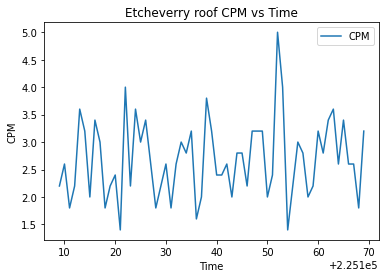

The mean of Etcheverry roof in cpm is  2.6918032786885244 +/- 1.6406715937958225
The standard deviation is  0.9218601071945358


In [123]:
plt.plot(etchRoofCPM_cut['cpm'], label = "CPM")
plt.ylabel('CPM')
plt.xlabel('Time')
plt.title('Etcheverry roof CPM vs Time')
plt.legend()
plt.show()
etchRoofCPM_mean = np.mean(etchRoofCPM_cut['cpm'])
etchRoofCPM_unc = np.sqrt(etchRoofCPM_mean)
etchRoofCPM_std_unc = etchRoofCPM_unc/ np.sqrt(2* len(etchRoofCPM_cut['cpm']))
etchRoofCPM_std = np.std(etchRoofCPM['cpm'])
print("The mean of Etcheverry roof in cpm is ", etchRoofCPM_mean, '+/-', etchRoofCPM_unc)
print("The standard deviation is ", etchRoofCPM_std)

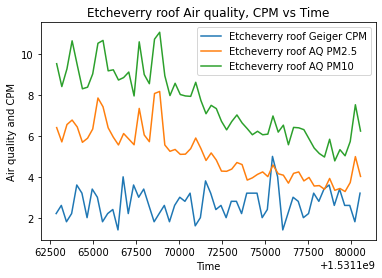

The mean of Etcheverry roof for PM25 air quality is  5.1005 +/- 2.258428657274788
The standard deviation is  1.2450654935919367
The mean of Etcheverry roof for PM10 air quality is  7.5943333333333305 +/- 2.7557818007478985
The standard deviation is  1.6673345661730745


In [124]:
plt.plot(etchRoofCPM_cut['deviceTime_unix'], etchRoofCPM_cut['cpm'],label = "Etcheverry roof Geiger CPM")
plt.plot(etchRoofAQ_cut['deviceTime_unix'],etchRoofAQ_cut['PM25'],label = "Etcheverry roof AQ PM2.5")
plt.plot(etchRoofAQ_cut['deviceTime_unix'],etchRoofAQ_cut['PM10'],label = "Etcheverry roof AQ PM10")
plt.ylabel('Air quality and CPM')
plt.xlabel('Time')
plt.title("Etcheverry roof Air quality, CPM vs Time")
plt.legend()
plt.show()
etchRoofAQ_mean = np.mean(etchRoofAQ_cut['PM25'])
etchRoofAQ_unc = np.sqrt(etchRoofAQ_mean)
etchRoofAQ_std_unc = etchRoofAQ_unc/ np.sqrt(2* len(etchRoofAQ_cut['PM25']))
etchRoofAQ_std = np.std(etchRoofAQ_cut['PM25'])
print("The mean of Etcheverry roof for PM25 air quality is ", etchRoofAQ_mean, '+/-', etchRoofAQ_unc)
print("The standard deviation is ", etchRoofAQ_std)
etchRoofAQ10_mean = np.mean(etchRoofAQ_cut['PM10'])
etchRoofAQ10_unc = np.sqrt(etchRoofAQ10_mean)
etchRoofAQ10_std_unc = etchRoofAQ10_unc/ np.sqrt(2* len(etchRoofAQ_cut['PM10']))
etchRoofAQ10_std = np.std(etchRoofAQ_cut['PM10'])
print("The mean of Etcheverry roof for PM10 air quality is ", etchRoofAQ10_mean, '+/-', etchRoofAQ10_unc)
print("The standard deviation is ", etchRoofAQ10_std)

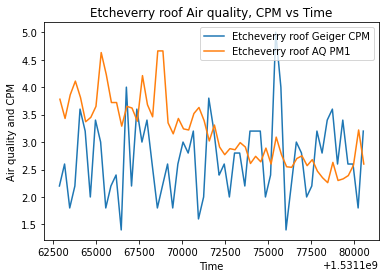

The mean of Etcheverry roof for PM1 air quality is  3.1868333333333325 +/- 1.7851703933611862
The standard deviation is  0.6049090611176379


In [125]:
plt.plot(etchRoofCPM_cut['deviceTime_unix'], etchRoofCPM_cut['cpm'],label = "Etcheverry roof Geiger CPM")
plt.plot(etchRoofAQ_cut['deviceTime_unix'],etchRoofAQ_cut['PM1'],label = "Etcheverry roof AQ PM1")
plt.ylabel('Air quality and CPM')
plt.xlabel('Time')
plt.title("Etcheverry roof Air quality, CPM vs Time")
plt.legend()
plt.show()
etchRoofAQ1_mean = np.mean(etchRoofAQ_cut['PM1'])
etchRoofAQ1_unc = np.sqrt(etchRoofAQ1_mean)
etchRoofAQ1_std_unc = etchRoofAQ1_unc/ np.sqrt(2* len(etchRoofAQ_cut['PM1']))
etchRoofAQ1_std = np.std(etchRoofAQ_cut['PM1'])
print("The mean of Etcheverry roof for PM1 air quality is ", etchRoofAQ1_mean, '+/-', etchRoofAQ1_unc)
print("The standard deviation is ", etchRoofAQ1_std)

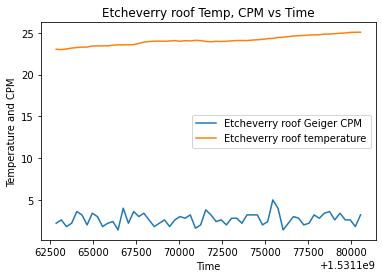

The mean of Etcheverry roof for temperature is  24.077868852459016 +/- 4.906920506026057
The standard deviation is  0.5537772374357417


In [128]:
plt.plot(etchRoofCPM_cut['deviceTime_unix'], etchRoofCPM_cut['cpm'],label = "Etcheverry roof Geiger CPM")
plt.plot(etchRoofWeather_cut['deviceTime_unix'],etchRoofWeather_cut['temperature'],label = "Etcheverry roof temperature")
plt.ylabel('Temperature and CPM')
plt.xlabel('Time')
plt.title("Etcheverry roof Temp, CPM vs Time")
plt.legend()
plt.show()
etchRoofWeatherTemp_mean = np.mean(etchRoofWeather_cut['temperature'])
etchRoofWeatherTemp_unc = np.sqrt(etchRoofWeatherTemp_mean)
etchRoofWeatherTemp_std_unc = etchRoofWeatherTemp_unc/ np.sqrt(2* len(etchRoofWeather_cut['temperature']))
etchRoofWeatherTemp_std = np.std(etchRoofWeather_cut['temperature'])
print("The mean of Etcheverry roof for temperature is ", etchRoofWeatherTemp_mean, '+/-', etchRoofWeatherTemp_unc)
print("The standard deviation is ", etchRoofWeatherTemp_std)

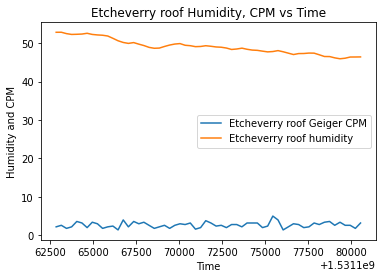

The mean of Etcheverry roof for humidity is  49.0711475409836 +/- 7.005080123808978
The standard deviation is  1.9344869259719095


In [129]:
plt.plot(etchRoofCPM_cut['deviceTime_unix'], etchRoofCPM_cut['cpm'],label = "Etcheverry roof Geiger CPM")
plt.plot(etchRoofWeather_cut['deviceTime_unix'],etchRoofWeather_cut['humidity'],label = "Etcheverry roof humidity")
plt.ylabel('Humidity and CPM')
plt.xlabel('Time')
plt.title("Etcheverry roof Humidity, CPM vs Time")
plt.legend()
plt.show()
etchRoofWeatherHumid_mean = np.mean(etchRoofWeather_cut['humidity'])
etchRoofWeatherHumid_unc = np.sqrt(etchRoofWeatherHumid_mean)
etchRoofWeatherHumid_std_unc = etchRoofWeatherHumid_unc/ np.sqrt(2* len(etchRoofWeather_cut['humidity']))
etchRoofWeatherHumid_std = np.std(etchRoofWeather_cut['humidity'])
print("The mean of Etcheverry roof for humidity is ", etchRoofWeatherHumid_mean, '+/-', etchRoofWeatherHumid_unc)
print("The standard deviation is ", etchRoofWeatherHumid_std)

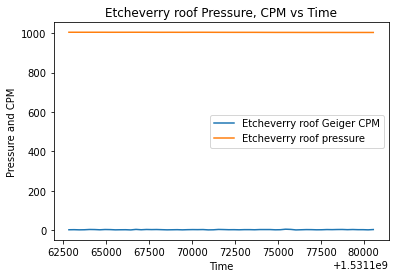

The mean of Etcheverry roof for pressure is  1004.3111475409838 +/- 31.690868519827344
The standard deviation is  0.3998938316507453


In [130]:
plt.plot(etchRoofCPM_cut['deviceTime_unix'], etchRoofCPM_cut['cpm'],label = "Etcheverry roof Geiger CPM")
plt.plot(etchRoofWeather_cut['deviceTime_unix'],etchRoofWeather_cut['pressure'],label = "Etcheverry roof pressure")
plt.ylabel('Pressure and CPM')
plt.xlabel('Time')
plt.title("Etcheverry roof Pressure, CPM vs Time")
plt.legend()
plt.show()
etchRoofWeatherPressure_mean = np.mean(etchRoofWeather_cut['pressure'])
etchRoofWeatherPressure_unc = np.sqrt(etchRoofWeatherPressure_mean)
etchRoofWeatherPressure_std_unc = etchRoofWeatherPressure_unc/ np.sqrt(2* len(etchRoofWeather_cut['pressure']))
etchRoofWeatherPressure_std = np.std(etchRoofWeather_cut['pressure'])
print("The mean of Etcheverry roof for pressure is ", etchRoofWeatherPressure_mean, '+/-', etchRoofWeatherPressure_unc)
print("The standard deviation is ", etchRoofWeatherPressure_std)

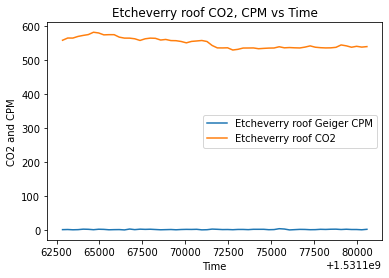

The mean of Etcheverry roof for CO2 is  550.0952459016393 +/- 23.454109360656595
The standard deviation is  14.828368094614065


In [131]:
plt.plot(etchRoofCPM_cut['deviceTime_unix'], etchRoofCPM_cut['cpm'],label = "Etcheverry roof Geiger CPM")
plt.plot(etchRoofCO2_cut['deviceTime_unix'],etchRoofCO2_cut['co2_ppm'],label = "Etcheverry roof CO2")
plt.ylabel('CO2 and CPM')
plt.xlabel('Time')
plt.title("Etcheverry roof CO2, CPM vs Time")
plt.legend()
plt.show()
etchRoofCO2_mean = np.mean(etchRoofCO2_cut['co2_ppm'])
etchRoofCO2_unc = np.sqrt(etchRoofCO2_mean)
etchRoofCO2_std_unc = etchRoofCO2_unc/ np.sqrt(2* len(etchRoofCO2_cut['co2_ppm']))
etchRoofCO2_std = np.std(etchRoofCO2_cut['co2_ppm'])
print("The mean of Etcheverry roof for CO2 is ", etchRoofCO2_mean, '+/-', etchRoofCO2_unc)
print("The standard deviation is ", etchRoofCO2_std)

In [70]:
etchRoofCPM_mean = np.mean(etchRoofCPM_cut['cpm'])
etchRoofCPM_unc = np.sqrt(etchRoofCPM_mean)



In [71]:
pinewoodCPM

,deviceTime_utc,deviceTime_local,deviceTime_unix,cpm,cpmError,error_flag
0,2018-02-01 21:21:45+00:00,2018-02-01 13:21:45-08:00,1517520105,2.0,0.632456,NaN
1,2018-02-01 21:21:47+00:00,2018-02-01 13:21:47-08:00,1517520107,2.0,0.632456,NaN
2,2018-02-01 21:26:45+00:00,2018-02-01 13:26:45-08:00,1517520405,1.8,0.600000,NaN
3,2018-02-01 21:26:46+00:00,2018-02-01 13:26:46-08:00,1517520406,1.8,0.600000,NaN
4,2018-02-01 21:31:45+00:00,2018-02-01 13:31:45-08:00,1517520705,1.0,0.447214,NaN
...,...,...,...,...,...,...
118707,2019-04-15 06:35:42+00:00,2019-04-14 23:35:42-07:00,1555310142,2.4,0.692820,NaN
118708,2019-04-15 06:40:42+00:00,2019-04-14 23:40:42-07:00,1555310442,2.2,0.663325,NaN
118709,2019-04-15 06:45:42+00:00,2019-04-14 23:45:42-07:00,1555310742,1.6,0.565685,NaN
118710,2019-04-15 06:50:42+00:00,2019-04-14 23:50:42-07:00,1555311042,1.8,0.600000,NaN


In [72]:
time_range = (pinewoodCPM['deviceTime_local']>'2019-03-03 12:00:00:-07:00')&(pinewoodCPM['deviceTime_local']<'2019-03-03 17:00:00:-07:00')
pinewoodCPM_cut = pinewoodCPM[time_range]
pinewoodCPM_cut

,deviceTime_utc,deviceTime_local,deviceTime_unix,cpm,cpmError,error_flag
108021,2019-03-03 20:00:43+00:00,2019-03-03 12:00:43-08:00,1551643243,2.0,0.632456,NaN
108022,2019-03-03 20:05:43+00:00,2019-03-03 12:05:43-08:00,1551643543,1.2,0.489898,NaN
108023,2019-03-03 20:10:43+00:00,2019-03-03 12:10:43-08:00,1551643843,1.2,0.489898,NaN
108024,2019-03-03 20:15:43+00:00,2019-03-03 12:15:43-08:00,1551644143,2.6,0.721110,NaN
108025,2019-03-03 20:20:43+00:00,2019-03-03 12:20:43-08:00,1551644443,1.8,0.600000,NaN
108026,2019-03-03 20:25:43+00:00,2019-03-03 12:25:43-08:00,1551644743,3.2,0.800000,NaN
108027,2019-03-03 20:30:43+00:00,2019-03-03 12:30:43-08:00,1551645043,2.2,0.663325,NaN
108028,2019-03-03 20:35:43+00:00,2019-03-03 12:35:43-08:00,1551645343,1.0,0.447214,NaN
108029,2019-03-03 20:40:43+00:00,2019-03-03 12:40:43-08:00,1551645643,2.8,0.748331,NaN
108030,2019-03-03 20:45:43+00:00,2019-03-03 12:45:43-08:00,1551645943,1.2,0.489898,NaN


In [73]:
pinewoodWeather

,deviceTime_utc,deviceTime_local,deviceTime_unix,temperature,pressure,humidity,error_flag
0,2018-02-01 21:21:45+00:00,2018-02-01 13:21:45-08:00,1517520105,24.36,1013.25,29.98,NaN
1,2018-02-01 21:26:45+00:00,2018-02-01 13:26:45-08:00,1517520405,24.56,1013.22,29.59,NaN
2,2018-02-01 21:31:45+00:00,2018-02-01 13:31:45-08:00,1517520705,24.53,1013.21,28.86,NaN
3,2018-02-01 21:36:45+00:00,2018-02-01 13:36:45-08:00,1517521005,24.39,1013.20,28.51,NaN
4,2018-02-01 21:41:45+00:00,2018-02-01 13:41:45-08:00,1517521305,24.21,1013.19,28.45,NaN
...,...,...,...,...,...,...,...
83374,2019-03-05 21:05:44+00:00,2019-03-05 13:05:44-08:00,1551819944,15.42,1003.69,77.39,NaN
83375,2019-03-05 21:10:44+00:00,2019-03-05 13:10:44-08:00,1551820244,15.16,1003.66,75.50,NaN
83376,2019-03-05 21:15:44+00:00,2019-03-05 13:15:44-08:00,1551820544,14.95,1003.52,75.17,NaN
83377,2019-03-05 21:20:44+00:00,2019-03-05 13:20:44-08:00,1551820844,14.86,1003.52,75.21,NaN


In [74]:
time_range = (pinewoodWeather['deviceTime_local']>'2019-03-03 12:00:00:-07:00')&(pinewoodWeather['deviceTime_local']<'2019-03-03 17:00:00:-07:00')
pinewoodWeather_cut = pinewoodWeather[time_range]
pinewoodWeather_cut

,deviceTime_utc,deviceTime_local,deviceTime_unix,temperature,pressure,humidity,error_flag
82786,2019-03-03 20:00:42+00:00,2019-03-03 12:00:42-08:00,1551643242,17.98,1011.76,71.88,NaN
82787,2019-03-03 20:05:42+00:00,2019-03-03 12:05:42-08:00,1551643542,18.20,1011.70,70.21,NaN
82788,2019-03-03 20:10:42+00:00,2019-03-03 12:10:42-08:00,1551643842,18.08,1011.65,70.44,NaN
82789,2019-03-03 20:15:42+00:00,2019-03-03 12:15:42-08:00,1551644142,18.15,1011.61,69.75,NaN
82790,2019-03-03 20:20:42+00:00,2019-03-03 12:20:42-08:00,1551644442,18.30,1011.51,69.42,NaN
82791,2019-03-03 20:25:42+00:00,2019-03-03 12:25:42-08:00,1551644742,18.32,1011.50,68.58,NaN
82792,2019-03-03 20:30:42+00:00,2019-03-03 12:30:42-08:00,1551645042,18.47,1011.48,68.06,NaN
82793,2019-03-03 20:35:42+00:00,2019-03-03 12:35:42-08:00,1551645342,18.53,1011.53,68.28,NaN
82794,2019-03-03 20:40:42+00:00,2019-03-03 12:40:42-08:00,1551645642,18.34,1011.48,68.91,NaN
82795,2019-03-03 20:45:42+00:00,2019-03-03 12:45:42-08:00,1551645942,18.48,1011.41,69.85,NaN


In [75]:
pinewoodAQ

,deviceTime_utc,deviceTime_local,deviceTime_unix,PM1,PM25,PM10,error_flag
0,2018-02-01 21:22:13+00:00,2018-02-01 13:22:13-08:00,1517520133,0.0,0.0,0.0,NaN
1,2018-02-01 21:27:13+00:00,2018-02-01 13:27:13-08:00,1517520433,0.0,0.0,0.0,NaN
2,2018-02-01 21:32:13+00:00,2018-02-01 13:32:13-08:00,1517520733,0.0,0.0,0.0,NaN
3,2018-02-01 21:37:13+00:00,2018-02-01 13:37:13-08:00,1517521033,0.0,0.0,0.0,NaN
4,2018-02-01 21:42:13+00:00,2018-02-01 13:42:13-08:00,1517521333,0.0,0.0,0.0,NaN
...,...,...,...,...,...,...,...
101507,2019-04-15 06:36:10+00:00,2019-04-14 23:36:10-07:00,1555310170,0.0,0.0,0.0,NaN
101508,2019-04-15 06:41:10+00:00,2019-04-14 23:41:10-07:00,1555310470,0.0,0.0,0.0,NaN
101509,2019-04-15 06:46:10+00:00,2019-04-14 23:46:10-07:00,1555310770,0.0,0.0,0.0,NaN
101510,2019-04-15 06:51:10+00:00,2019-04-14 23:51:10-07:00,1555311070,0.0,0.0,0.0,NaN


In [76]:
time_range = (pinewoodAQ['deviceTime_local']>'2019-03-03 12:00:00:-07:00')&(pinewoodAQ['deviceTime_local']<'2019-03-03 17:00:00:-07:00')
pinewoodAQ_cut = pinewoodAQ[time_range]
pinewoodAQ_cut

,deviceTime_utc,deviceTime_local,deviceTime_unix,PM1,PM25,PM10,error_flag
90821,2019-03-03 20:01:11+00:00,2019-03-03 12:01:11-08:00,1551643271,0.0,0.0,0.0,NaN
90822,2019-03-03 20:06:11+00:00,2019-03-03 12:06:11-08:00,1551643571,0.0,0.0,0.0,NaN
90823,2019-03-03 20:11:11+00:00,2019-03-03 12:11:11-08:00,1551643871,0.0,0.0,0.0,NaN
90824,2019-03-03 20:16:11+00:00,2019-03-03 12:16:11-08:00,1551644171,0.0,0.0,0.0,NaN
90825,2019-03-03 20:21:11+00:00,2019-03-03 12:21:11-08:00,1551644471,0.0,0.0,0.0,NaN
90826,2019-03-03 20:26:11+00:00,2019-03-03 12:26:11-08:00,1551644771,0.0,0.0,0.0,NaN
90827,2019-03-03 20:31:11+00:00,2019-03-03 12:31:11-08:00,1551645071,0.0,0.0,0.0,NaN
90828,2019-03-03 20:36:11+00:00,2019-03-03 12:36:11-08:00,1551645371,0.0,0.0,0.0,NaN
90829,2019-03-03 20:41:11+00:00,2019-03-03 12:41:11-08:00,1551645671,0.0,0.0,0.0,NaN
90830,2019-03-03 20:46:11+00:00,2019-03-03 12:46:11-08:00,1551645971,0.0,0.0,0.0,NaN


In [77]:
pinewoodCO2

,deviceTime_utc,deviceTime_local,deviceTime_unix,co2_ppm,noise,error_flag
0,2018-02-01 21:21:45+00:00,2018-02-01 13:21:45-08:00,1517520105,612.94,6.31,NaN
1,2018-02-01 21:26:45+00:00,2018-02-01 13:26:45-08:00,1517520405,570.20,6.32,NaN
2,2018-02-01 21:31:45+00:00,2018-02-01 13:31:45-08:00,1517520705,547.04,6.32,NaN
3,2018-02-01 21:36:45+00:00,2018-02-01 13:36:45-08:00,1517521005,540.92,6.32,NaN
4,2018-02-01 21:41:45+00:00,2018-02-01 13:41:45-08:00,1517521305,540.04,6.30,NaN
...,...,...,...,...,...,...
110985,2019-04-15 06:35:41+00:00,2019-04-14 23:35:41-07:00,1555310141,500.45,4.95,NaN
110986,2019-04-15 06:40:41+00:00,2019-04-14 23:40:41-07:00,1555310441,520.82,4.99,NaN
110987,2019-04-15 06:45:41+00:00,2019-04-14 23:45:41-07:00,1555310741,528.54,5.05,NaN
110988,2019-04-15 06:50:41+00:00,2019-04-14 23:50:41-07:00,1555311041,526.81,5.01,NaN


In [78]:
time_range = (pinewoodCO2['deviceTime_local']>'2019-03-03 12:00:00:-07:00')&(pinewoodCO2['deviceTime_local']<'2019-03-03 17:00:00:-07:00')
pinewoodCO2_cut = pinewoodCO2[time_range]
pinewoodCO2_cut

,deviceTime_utc,deviceTime_local,deviceTime_unix,co2_ppm,noise,error_flag
100300,2019-03-03 20:00:42+00:00,2019-03-03 12:00:42-08:00,1551643242,424.90,6.19,NaN
100301,2019-03-03 20:05:42+00:00,2019-03-03 12:05:42-08:00,1551643542,420.26,6.27,NaN
100302,2019-03-03 20:10:42+00:00,2019-03-03 12:10:42-08:00,1551643842,420.28,6.23,NaN
100303,2019-03-03 20:15:42+00:00,2019-03-03 12:15:42-08:00,1551644142,422.21,6.18,NaN
100304,2019-03-03 20:20:42+00:00,2019-03-03 12:20:42-08:00,1551644442,422.59,6.21,NaN
100305,2019-03-03 20:25:42+00:00,2019-03-03 12:25:42-08:00,1551644742,421.37,6.20,NaN
100306,2019-03-03 20:30:42+00:00,2019-03-03 12:30:42-08:00,1551645042,423.00,6.21,NaN
100307,2019-03-03 20:35:42+00:00,2019-03-03 12:35:42-08:00,1551645342,423.82,6.23,NaN
100308,2019-03-03 20:40:42+00:00,2019-03-03 12:40:42-08:00,1551645642,421.14,6.25,NaN
100309,2019-03-03 20:45:42+00:00,2019-03-03 12:45:42-08:00,1551645942,420.87,6.23,NaN


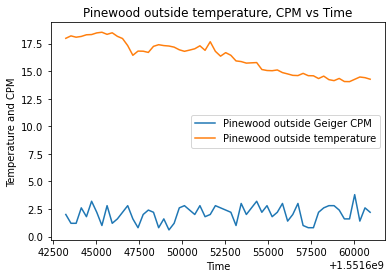

The mean of Pinewood outside for temperature is  16.25254237288135 +/- 4.0314442043616765
The standard deviation is  1.4713047285102914


In [134]:
plt.plot(pinewoodCPM_cut['deviceTime_unix'], pinewoodCPM_cut['cpm'],label = "Pinewood outside Geiger CPM")
plt.plot(pinewoodWeather_cut['deviceTime_unix'],pinewoodWeather_cut['temperature'],label = "Pinewood outside temperature")
plt.ylabel('Temperature and CPM')
plt.xlabel('Time')
plt.title("Pinewood outside temperature, CPM vs Time")
plt.legend()
plt.show()
pinewoodWeatherTemp_mean = np.mean(pinewoodWeather_cut['temperature'])
pinewoodWeatherTemp_unc = np.sqrt(pinewoodWeatherTemp_mean)
pinewoodWeatherTemp_std_unc = pinewoodWeatherTemp_unc/ np.sqrt(2* len(pinewoodWeather_cut['temperature']))
pinewoodWeatherTemp_std = np.std(pinewoodWeather_cut['temperature'])
print("The mean of Pinewood outside for temperature is ", pinewoodWeatherTemp_mean, '+/-', pinewoodWeatherTemp_unc)
print("The standard deviation is ", pinewoodWeatherTemp_std)

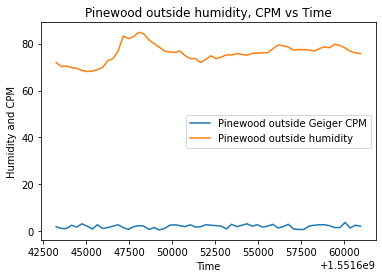

The mean of Pinewood outside for humidity is  75.89847457627118 +/- 8.71197305874342
The standard deviation is  3.9358860969288356


In [135]:
plt.plot(pinewoodCPM_cut['deviceTime_unix'], pinewoodCPM_cut['cpm'],label = "Pinewood outside Geiger CPM")
plt.plot(pinewoodWeather_cut['deviceTime_unix'],pinewoodWeather_cut['humidity'],label = "Pinewood outside humidity")
plt.ylabel('Humidity and CPM')
plt.xlabel('Time')
plt.title("Pinewood outside humidity, CPM vs Time")
plt.legend()
plt.show()
pinewoodWeatherHumid_mean = np.mean(pinewoodWeather_cut['humidity'])
pinewoodWeatherHumid_unc = np.sqrt(pinewoodWeatherHumid_mean)
pinewoodWeatherHumid_std_unc = pinewoodWeatherHumid_unc/ np.sqrt(2* len(pinewoodWeather_cut['humidity']))
pinewoodWeatherHumid_std = np.std(pinewoodWeather_cut['humidity'])
print("The mean of Pinewood outside for humidity is ", pinewoodWeatherHumid_mean, '+/-', pinewoodWeatherHumid_unc)
print("The standard deviation is ", pinewoodWeatherHumid_std)

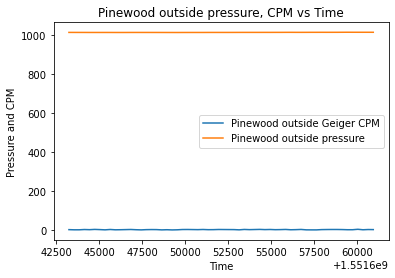

The mean of Pinewood outside for pressure is  1011.8149152542372 +/- 31.809038263585354
The standard deviation is  0.3681440989122662


In [136]:
plt.plot(pinewoodCPM_cut['deviceTime_unix'], pinewoodCPM_cut['cpm'],label = "Pinewood outside Geiger CPM")
plt.plot(pinewoodWeather_cut['deviceTime_unix'],pinewoodWeather_cut['pressure'],label = "Pinewood outside pressure")
plt.ylabel('Pressure and CPM')
plt.xlabel('Time')
plt.title("Pinewood outside pressure, CPM vs Time")
plt.legend()
plt.show()
pinewoodWeatherPressure_mean = np.mean(pinewoodWeather_cut['pressure'])
pinewoodWeatherPressure_unc = np.sqrt(pinewoodWeatherPressure_mean)
pinewoodWeatherPressure_std_unc = pinewoodWeatherPressure_unc/ np.sqrt(2* len(pinewoodWeather_cut['pressure']))
pinewoodWeatherPressure_std = np.std(pinewoodWeather_cut['pressure'])
print("The mean of Pinewood outside for pressure is ", pinewoodWeatherPressure_mean, '+/-', pinewoodWeatherPressure_unc)
print("The standard deviation is ", pinewoodWeatherPressure_std)

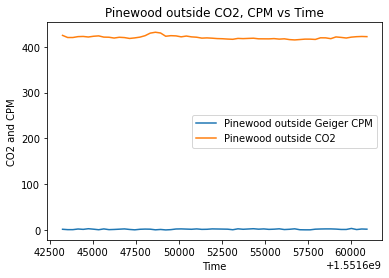

The mean of Pinewood outside for CO2 is  420.3594915254238 +/- 20.502670351088994
The standard deviation is  3.4154164069669477


In [137]:
plt.plot(pinewoodCPM_cut['deviceTime_unix'], pinewoodCPM_cut['cpm'],label = "Pinewood outside Geiger CPM")
plt.plot(pinewoodCO2_cut['deviceTime_unix'],pinewoodCO2_cut['co2_ppm'],label = "Pinewood outside CO2")
plt.ylabel('CO2 and CPM')
plt.xlabel('Time')
plt.title("Pinewood outside CO2, CPM vs Time")
plt.legend()
plt.show()
pinewoodCO2_mean = np.mean(pinewoodCO2_cut['co2_ppm'])
pinewoodCO2_unc = np.sqrt(pinewoodCO2_mean)
pinewoodCO2_std_unc = pinewoodCO2_unc/ np.sqrt(2* len(pinewoodCO2_cut['co2_ppm']))
pinewoodCO2_std = np.std(pinewoodCO2_cut['co2_ppm'])
print("The mean of Pinewood outside for CO2 is ", pinewoodCO2_mean, '+/-', pinewoodCO2_unc)
print("The standard deviation is ", pinewoodCO2_std)

In [83]:
pinewoodAQ

,deviceTime_utc,deviceTime_local,deviceTime_unix,PM1,PM25,PM10,error_flag
0,2018-02-01 21:22:13+00:00,2018-02-01 13:22:13-08:00,1517520133,0.0,0.0,0.0,NaN
1,2018-02-01 21:27:13+00:00,2018-02-01 13:27:13-08:00,1517520433,0.0,0.0,0.0,NaN
2,2018-02-01 21:32:13+00:00,2018-02-01 13:32:13-08:00,1517520733,0.0,0.0,0.0,NaN
3,2018-02-01 21:37:13+00:00,2018-02-01 13:37:13-08:00,1517521033,0.0,0.0,0.0,NaN
4,2018-02-01 21:42:13+00:00,2018-02-01 13:42:13-08:00,1517521333,0.0,0.0,0.0,NaN
...,...,...,...,...,...,...,...
101507,2019-04-15 06:36:10+00:00,2019-04-14 23:36:10-07:00,1555310170,0.0,0.0,0.0,NaN
101508,2019-04-15 06:41:10+00:00,2019-04-14 23:41:10-07:00,1555310470,0.0,0.0,0.0,NaN
101509,2019-04-15 06:46:10+00:00,2019-04-14 23:46:10-07:00,1555310770,0.0,0.0,0.0,NaN
101510,2019-04-15 06:51:10+00:00,2019-04-14 23:51:10-07:00,1555311070,0.0,0.0,0.0,NaN


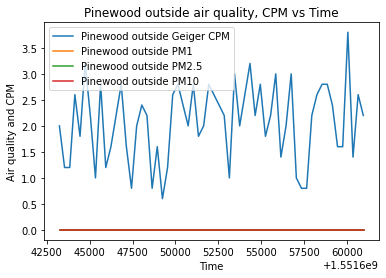

The mean of Pinewood outside for air quality for PM2.5, PM10, and PM1 is  0.0 +/- 0.0
The standard deviation is  0.0


In [140]:
plt.plot(pinewoodCPM_cut['deviceTime_unix'], pinewoodCPM_cut['cpm'],label = "Pinewood outside Geiger CPM")
plt.plot(pinewoodAQ_cut['deviceTime_unix'],pinewoodAQ_cut['PM1'],label = "Pinewood outside PM1")
plt.plot(pinewoodAQ_cut['deviceTime_unix'],pinewoodAQ_cut['PM25'],label = "Pinewood outside PM2.5")
plt.plot(pinewoodAQ_cut['deviceTime_unix'],pinewoodAQ_cut['PM10'],label = "Pinewood outside PM10")
plt.ylabel('Air quality and CPM')
plt.xlabel('Time')
plt.title("Pinewood outside air quality, CPM vs Time")
plt.legend()
plt.show()
pinewoodAQ25_mean = np.mean(pinewoodAQ_cut['PM25'])
pinewoodAQ25_unc = np.sqrt(pinewoodAQ25_mean)
pinewoodAQ25_std_unc = pinewoodAQ25_unc/ np.sqrt(2* len(pinewoodAQ_cut['PM25']))
pinewoodAQ25_std = np.std(pinewoodAQ_cut['PM25'])
print("The mean of Pinewood outside for air quality for PM2.5, PM10, and PM1 is ", pinewoodAQ25_mean, '+/-', pinewoodAQ25_unc)
print("The standard deviation is ", pinewoodAQ25_std)

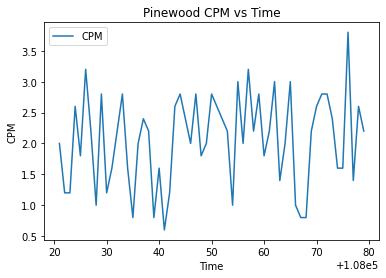

The mean of Pinewood outside for radiation in cpm is  2.061016949152542 +/- 1.435624236752968
The standard deviation is  0.7330033295072118


In [133]:
plt.plot(pinewoodCPM_cut['cpm'], label = "CPM")
plt.ylabel('CPM')
plt.xlabel('Time')
plt.title('Pinewood CPM vs Time')
plt.legend()
plt.show()
pinewoodCPM_mean = np.mean(pinewoodCPM_cut['cpm'])
pinewoodCPM_unc = np.sqrt(pinewoodCPM_mean)
pinewoodCPM_std_unc = pinewoodCPM_unc/ np.sqrt(2* len(pinewoodCPM_cut['cpm']))
pinewoodCPM_std = np.std(pinewoodCPM_cut['cpm'])
print("The mean of Pinewood outside for radiation in cpm is ", pinewoodCPM_mean, '+/-', pinewoodCPM_unc)
print("The standard deviation is ", pinewoodCPM_std)

In [86]:
exploratoriumCPM

,deviceTime_utc,deviceTime_local,deviceTime_unix,cpm,cpmError,error_flag
0,2019-02-01 22:02:49+00:00,2019-02-01 14:02:49-08:00,1.549059e+09,1.6,0.565685,NaN
1,2019-02-01 22:07:49+00:00,2019-02-01 14:07:49-08:00,1.549059e+09,4.0,0.894427,NaN
2,2019-02-01 22:12:49+00:00,2019-02-01 14:12:49-08:00,1.549059e+09,2.6,0.721110,NaN
3,2019-02-01 22:17:49+00:00,2019-02-01 14:17:49-08:00,1.549059e+09,1.6,0.565685,NaN
4,2019-02-01 22:22:49+00:00,2019-02-01 14:22:49-08:00,1.549060e+09,3.2,0.800000,NaN
...,...,...,...,...,...,...
223363,2021-04-23 23:11:22+0000,2021-04-23 16:11:22-0700,1.619219e+09,1.6,0.565685,0.0
223364,2021-04-23 23:16:22+0000,2021-04-23 16:16:22-0700,1.619220e+09,2.4,0.692820,0.0
223365,2021-04-23 23:21:22+0000,2021-04-23 16:21:22-0700,1.619220e+09,1.8,0.600000,0.0
223366,2021-04-23 23:26:22+0000,2021-04-23 16:26:22-0700,1.619220e+09,1.6,0.565685,0.0


In [87]:
time_range = (exploratoriumCPM['deviceTime_local']>'2019-03-03 12:00:00:-07:00')&(exploratoriumCPM['deviceTime_local']<'2019-03-03 17:00:00:-07:00')
exploratoriumCPM_cut = exploratoriumCPM[time_range]
exploratoriumCPM_cut

,deviceTime_utc,deviceTime_local,deviceTime_unix,cpm,cpmError,error_flag
7935,2019-03-03 20:01:17+00:00,2019-03-03 12:01:17-08:00,1.551643e+09,1.8,0.600000,NaN
7936,2019-03-03 20:06:17+00:00,2019-03-03 12:06:17-08:00,1.551644e+09,2.0,0.632456,NaN
7937,2019-03-03 20:11:17+00:00,2019-03-03 12:11:17-08:00,1.551644e+09,1.8,0.600000,NaN
7938,2019-03-03 20:16:17+00:00,2019-03-03 12:16:17-08:00,1.551644e+09,1.4,0.529150,NaN
7939,2019-03-03 20:21:17+00:00,2019-03-03 12:21:17-08:00,1.551644e+09,1.0,0.447214,NaN
7940,2019-03-03 20:26:17+00:00,2019-03-03 12:26:17-08:00,1.551645e+09,2.4,0.692820,NaN
7941,2019-03-03 20:31:17+00:00,2019-03-03 12:31:17-08:00,1.551645e+09,1.6,0.565685,NaN
7942,2019-03-03 20:36:17+00:00,2019-03-03 12:36:17-08:00,1.551645e+09,2.6,0.721110,NaN
7943,2019-03-03 20:41:17+00:00,2019-03-03 12:41:17-08:00,1.551646e+09,1.8,0.600000,NaN
7944,2019-03-03 20:46:17+00:00,2019-03-03 12:46:17-08:00,1.551646e+09,2.8,0.748331,NaN


In [88]:
exploratoriumWeather

,deviceTime_utc,deviceTime_local,deviceTime_unix,temperature,pressure,humidity,error_flag
0,2019-02-01 22:02:48+00:00,2019-02-01 14:02:48-08:00,1549058568,23.77,1008.41,49.39,NaN
1,2019-02-01 22:07:48+00:00,2019-02-01 14:07:48-08:00,1549058868,24.65,1008.30,46.61,NaN
2,2019-02-01 22:12:48+00:00,2019-02-01 14:12:48-08:00,1549059168,25.23,1008.21,44.88,NaN
3,2019-02-01 22:17:48+00:00,2019-02-01 14:17:48-08:00,1549059468,25.68,1008.13,43.59,NaN
4,2019-02-01 22:22:48+00:00,2019-02-01 14:22:48-08:00,1549059768,25.97,1008.04,42.64,NaN
...,...,...,...,...,...,...,...
10592,2019-05-15 07:06:29+00:00,2019-05-15 00:06:29-07:00,1557903989,14.59,1014.06,100.00,NaN
10593,2019-05-15 07:10:37+00:00,2019-05-15 00:10:37-07:00,1557904237,14.59,1014.06,100.00,NaN
10594,2019-05-15 07:11:29+00:00,2019-05-15 00:11:29-07:00,1557904289,14.43,1013.93,100.00,NaN
10595,2019-05-15 07:15:39+00:00,2019-05-15 00:15:39-07:00,1557904539,14.43,1013.93,100.00,NaN


In [113]:
time_range = (exploratoriumWeather['deviceTime_local']>'2019-03-03 12:00:00:-08:00')&(exploratoriumWeather['deviceTime_local']<'2019-03-03 17:00:00:-08:00')
exploratoriumWeather_cut = exploratoriumWeather[time_range]
exploratoriumWeather_cut

,deviceTime_utc,deviceTime_local,deviceTime_unix,temperature,pressure,humidity,error_flag


In [92]:
univWashCPM

,deviceTime_utc,deviceTime_local,deviceTime_unix,cpm,cpmError,error_flag
0,2019-05-31 21:45:13+00:00,2019-05-31 14:45:13-07:00,1.559339e+09,2.6,0.721110,NaN
1,2019-05-31 21:50:13+00:00,2019-05-31 14:50:13-07:00,1.559339e+09,2.2,0.663325,NaN
2,2019-05-31 21:55:13+00:00,2019-05-31 14:55:13-07:00,1.559340e+09,3.2,0.800000,NaN
3,2019-05-31 22:00:13+00:00,2019-05-31 15:00:13-07:00,1.559340e+09,2.8,0.748331,NaN
4,2019-05-31 22:05:13+00:00,2019-05-31 15:05:13-07:00,1.559340e+09,0.8,0.400000,NaN
...,...,...,...,...,...,...
190729,2021-04-23 22:55:55+0000,2021-04-23 15:55:55-0700,1.619219e+09,2.4,0.692820,0.0
190730,2021-04-23 23:00:55+0000,2021-04-23 16:00:55-0700,1.619219e+09,2.6,0.721110,0.0
190731,2021-04-23 23:05:55+0000,2021-04-23 16:05:55-0700,1.619219e+09,3.2,0.800000,0.0
190732,2021-04-23 23:10:55+0000,2021-04-23 16:10:55-0700,1.619219e+09,1.2,0.489898,0.0


In [95]:
time_range = (univWashCPM['deviceTime_local']>'2019-06-01 12:00:00:-07:00')&(univWashCPM['deviceTime_local']<'2019-06-01 17:00:00:-07:00')
univWashCPM_cut = univWashCPM[time_range]
univWashCPM_cut

,deviceTime_utc,deviceTime_local,deviceTime_unix,cpm,cpmError,error_flag
255,2019-06-01 19:00:13+00:00,2019-06-01 12:00:13-07:00,1.559416e+09,1.6,0.565685,NaN
256,2019-06-01 19:05:13+00:00,2019-06-01 12:05:13-07:00,1.559416e+09,3.2,0.800000,NaN
257,2019-06-01 19:10:13+00:00,2019-06-01 12:10:13-07:00,1.559416e+09,2.6,0.721110,NaN
258,2019-06-01 19:15:13+00:00,2019-06-01 12:15:13-07:00,1.559417e+09,2.2,0.663325,NaN
259,2019-06-01 19:20:13+00:00,2019-06-01 12:20:13-07:00,1.559417e+09,2.2,0.663325,NaN
260,2019-06-01 19:25:13+00:00,2019-06-01 12:25:13-07:00,1.559417e+09,2.6,0.721110,NaN
261,2019-06-01 19:30:13+00:00,2019-06-01 12:30:13-07:00,1.559417e+09,2.2,0.663325,NaN
262,2019-06-01 19:35:13+00:00,2019-06-01 12:35:13-07:00,1.559418e+09,2.2,0.663325,NaN
263,2019-06-01 19:40:13+00:00,2019-06-01 12:40:13-07:00,1.559418e+09,2.4,0.692820,NaN
264,2019-06-01 19:45:13+00:00,2019-06-01 12:45:13-07:00,1.559418e+09,4.4,0.938083,NaN


In [96]:
univWashAQ

,deviceTime_utc,deviceTime_local,deviceTime_unix,PM1,PM25,PM10,error_flag
0,2019-05-31 21:45:41+00:00,2019-05-31 14:45:41-07:00,1.559339e+09,1.42,3.42,4.61,NaN
1,2019-05-31 21:50:41+00:00,2019-05-31 14:50:41-07:00,1.559339e+09,1.37,3.41,4.68,NaN
2,2019-05-31 21:55:41+00:00,2019-05-31 14:55:41-07:00,1.559340e+09,1.16,3.16,4.40,NaN
3,2019-05-31 22:00:41+00:00,2019-05-31 15:00:41-07:00,1.559340e+09,1.82,3.82,4.79,NaN
4,2019-05-31 22:05:41+00:00,2019-05-31 15:05:41-07:00,1.559340e+09,1.22,3.22,4.78,NaN
...,...,...,...,...,...,...,...
169934,2021-03-30 14:41:09+0000,2021-03-30 07:41:09-0700,1.617115e+09,0.00,0.00,0.00,0.0
169935,2021-03-30 14:46:09+0000,2021-03-30 07:46:09-0700,1.617116e+09,0.00,0.00,0.00,0.0
169936,2021-03-30 14:51:09+0000,2021-03-30 07:51:09-0700,1.617116e+09,0.00,0.00,0.00,0.0
169937,2021-03-30 14:56:09+0000,2021-03-30 07:56:09-0700,1.617116e+09,0.00,0.00,0.00,0.0


In [97]:
time_range = (univWashAQ['deviceTime_local']>'2019-06-01 12:00:00:-07:00')&(univWashAQ['deviceTime_local']<'2019-06-01 17:00:00:-07:00')
univWashAQ_cut = univWashAQ[time_range]
univWashAQ_cut

,deviceTime_utc,deviceTime_local,deviceTime_unix,PM1,PM25,PM10,error_flag
255,2019-06-01 19:00:41+00:00,2019-06-01 12:00:41-07:00,1.559416e+09,2.29,4.55,5.33,NaN
256,2019-06-01 19:05:41+00:00,2019-06-01 12:05:41-07:00,1.559416e+09,1.94,3.94,4.43,NaN
257,2019-06-01 19:10:41+00:00,2019-06-01 12:10:41-07:00,1.559416e+09,1.83,3.83,4.87,NaN
258,2019-06-01 19:15:41+00:00,2019-06-01 12:15:41-07:00,1.559417e+09,2.27,4.00,5.00,NaN
259,2019-06-01 19:20:41+00:00,2019-06-01 12:20:41-07:00,1.559417e+09,1.91,3.90,5.00,NaN
260,2019-06-01 19:25:41+00:00,2019-06-01 12:25:41-07:00,1.559417e+09,2.00,4.03,4.97,NaN
261,2019-06-01 19:30:41+00:00,2019-06-01 12:30:41-07:00,1.559417e+09,1.56,3.49,4.40,NaN
262,2019-06-01 19:35:41+00:00,2019-06-01 12:35:41-07:00,1.559418e+09,2.17,4.29,5.36,NaN
263,2019-06-01 19:40:41+00:00,2019-06-01 12:40:41-07:00,1.559418e+09,1.93,3.93,5.35,NaN
264,2019-06-01 19:45:41+00:00,2019-06-01 12:45:41-07:00,1.559418e+09,2.43,4.29,5.13,NaN


In [98]:
univWashWeather

,deviceTime_utc,deviceTime_local,deviceTime_unix,temperature,pressure,humidity,error_flag
0,2019-05-31 21:45:12+00:00,2019-05-31 14:45:12-07:00,1.559339e+09,24.01,1015.78,52.91,NaN
1,2019-05-31 21:50:12+00:00,2019-05-31 14:50:12-07:00,1.559339e+09,24.18,1015.76,52.34,NaN
2,2019-05-31 21:55:12+00:00,2019-05-31 14:55:12-07:00,1.559340e+09,24.29,1015.70,51.94,NaN
3,2019-05-31 22:00:12+00:00,2019-05-31 15:00:12-07:00,1.559340e+09,24.38,1015.63,51.58,NaN
4,2019-05-31 22:05:12+00:00,2019-05-31 15:05:12-07:00,1.559340e+09,24.46,1015.59,51.29,NaN
...,...,...,...,...,...,...,...
184826,2021-04-23 22:55:56+0000,2021-04-23 15:55:56-0700,1.619219e+09,25.66,1005.95,30.26,0.0
184827,2021-04-23 23:00:56+0000,2021-04-23 16:00:56-0700,1.619219e+09,25.72,1005.89,30.10,0.0
184828,2021-04-23 23:05:56+0000,2021-04-23 16:05:56-0700,1.619219e+09,25.76,1005.84,29.59,0.0
184829,2021-04-23 23:10:56+0000,2021-04-23 16:10:56-0700,1.619219e+09,25.78,1005.78,29.62,0.0


In [99]:
time_range = (univWashWeather['deviceTime_local']>'2019-06-01 12:00:00:-07:00')&(univWashWeather['deviceTime_local']<'2019-06-01 17:00:00:-07:00')
univWashWeather_cut = univWashWeather[time_range]
univWashWeather_cut

,deviceTime_utc,deviceTime_local,deviceTime_unix,temperature,pressure,humidity,error_flag
255,2019-06-01 19:00:12+00:00,2019-06-01 12:00:12-07:00,1.559416e+09,23.94,1015.58,50.04,NaN
256,2019-06-01 19:05:12+00:00,2019-06-01 12:05:12-07:00,1.559416e+09,23.96,1015.50,49.99,NaN
257,2019-06-01 19:10:12+00:00,2019-06-01 12:10:12-07:00,1.559416e+09,23.97,1015.44,49.99,NaN
258,2019-06-01 19:15:12+00:00,2019-06-01 12:15:12-07:00,1.559417e+09,23.96,1015.35,50.03,NaN
259,2019-06-01 19:20:12+00:00,2019-06-01 12:20:12-07:00,1.559417e+09,23.99,1015.27,50.01,NaN
260,2019-06-01 19:25:12+00:00,2019-06-01 12:25:12-07:00,1.559417e+09,24.00,1015.21,49.98,NaN
261,2019-06-01 19:30:12+00:00,2019-06-01 12:30:12-07:00,1.559417e+09,24.00,1015.14,50.01,NaN
262,2019-06-01 19:35:12+00:00,2019-06-01 12:35:12-07:00,1.559418e+09,23.99,1015.03,50.04,NaN
263,2019-06-01 19:40:12+00:00,2019-06-01 12:40:12-07:00,1.559418e+09,24.00,1014.98,50.05,NaN
264,2019-06-01 19:45:12+00:00,2019-06-01 12:45:12-07:00,1.559418e+09,24.05,1014.98,49.98,NaN


In [102]:
univWashCO2

,deviceTime_utc,deviceTime_local,deviceTime_unix,co2_ppm,noise,error_flag
0,2019-05-31 21:45:12+00:00,2019-05-31 14:45:12-07:00,1.559339e+09,0.00,0.55,NaN
1,2019-05-31 21:50:12+00:00,2019-05-31 14:50:12-07:00,1.559339e+09,0.00,0.00,NaN
2,2019-05-31 21:55:12+00:00,2019-05-31 14:55:12-07:00,1.559340e+09,0.00,0.00,NaN
3,2019-05-31 22:00:12+00:00,2019-05-31 15:00:12-07:00,1.559340e+09,0.00,0.00,NaN
4,2019-05-31 22:05:12+00:00,2019-05-31 15:05:12-07:00,1.559340e+09,0.00,0.00,NaN
...,...,...,...,...,...,...
175969,2021-04-23 22:55:55+0000,2021-04-23 15:55:55-0700,1.619219e+09,510.80,6.80,0.0
175970,2021-04-23 23:00:55+0000,2021-04-23 16:00:55-0700,1.619219e+09,508.26,6.83,0.0
175971,2021-04-23 23:05:55+0000,2021-04-23 16:05:55-0700,1.619219e+09,508.70,6.84,0.0
175972,2021-04-23 23:10:55+0000,2021-04-23 16:10:55-0700,1.619219e+09,517.08,6.84,0.0


In [103]:
time_range = (univWashCO2['deviceTime_local']>'2019-06-01 12:00:00:-07:00')&(univWashCO2['deviceTime_local']<'2019-06-01 17:00:00:-07:00')
univWashCO2_cut = univWashCO2[time_range]
univWashCO2_cut

,deviceTime_utc,deviceTime_local,deviceTime_unix,co2_ppm,noise,error_flag
255,2019-06-01 19:00:12+00:00,2019-06-01 12:00:12-07:00,1.559416e+09,0.0,0.0,NaN
256,2019-06-01 19:05:12+00:00,2019-06-01 12:05:12-07:00,1.559416e+09,0.0,0.0,NaN
257,2019-06-01 19:10:12+00:00,2019-06-01 12:10:12-07:00,1.559416e+09,0.0,0.0,NaN
258,2019-06-01 19:15:12+00:00,2019-06-01 12:15:12-07:00,1.559417e+09,0.0,0.0,NaN
259,2019-06-01 19:20:12+00:00,2019-06-01 12:20:12-07:00,1.559417e+09,0.0,0.0,NaN
260,2019-06-01 19:25:12+00:00,2019-06-01 12:25:12-07:00,1.559417e+09,0.0,0.0,NaN
261,2019-06-01 19:30:12+00:00,2019-06-01 12:30:12-07:00,1.559417e+09,0.0,0.0,NaN
262,2019-06-01 19:35:12+00:00,2019-06-01 12:35:12-07:00,1.559418e+09,0.0,0.0,NaN
263,2019-06-01 19:40:12+00:00,2019-06-01 12:40:12-07:00,1.559418e+09,0.0,0.0,NaN
264,2019-06-01 19:45:12+00:00,2019-06-01 12:45:12-07:00,1.559418e+09,0.0,0.0,NaN


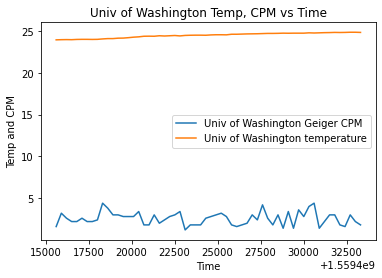

The mean of the University of Washington for the temperature is  24.47083333333332 +/- 4.946800312660025
The standard deviation is  0.2921260667740708


In [142]:
plt.plot(univWashCPM_cut['deviceTime_unix'], univWashCPM_cut['cpm'],label = "Univ of Washington Geiger CPM")
plt.plot(univWashWeather_cut['deviceTime_unix'],univWashWeather_cut['temperature'],label = "Univ of Washington temperature")
plt.ylabel('Temp and CPM')
plt.xlabel('Time')
plt.title("Univ of Washington Temp, CPM vs Time")
plt.legend()
plt.show()
univWashWeatherTemp_mean = np.mean(univWashWeather_cut['temperature'])
univWashWeatherTemp_unc = np.sqrt(univWashWeatherTemp_mean)
univWashWeatherTemp_std_unc = univWashWeatherTemp_unc/ np.sqrt(2* len(univWashWeather_cut['temperature']))
univWashWeatherTemp_std = np.std(univWashWeather_cut['temperature'])
print("The mean of the University of Washington for the temperature is ", univWashWeatherTemp_mean, '+/-', univWashWeatherTemp_unc)
print("The standard deviation is ", univWashWeatherTemp_std)

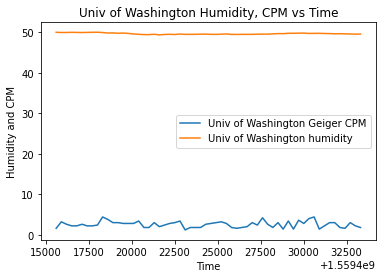

The mean of the University of Washington for humidity is  49.694333333333326 +/- 7.049420779988475
The standard deviation is  0.18066881917536884


In [143]:
plt.plot(univWashCPM_cut['deviceTime_unix'], univWashCPM_cut['cpm'],label = "Univ of Washington Geiger CPM")
plt.plot(univWashWeather_cut['deviceTime_unix'],univWashWeather_cut['humidity'],label = "Univ of Washington humidity")
plt.ylabel('Humidity and CPM')
plt.xlabel('Time')
plt.title("Univ of Washington Humidity, CPM vs Time")
plt.legend()
plt.show()
univWashWeatherHumid_mean = np.mean(univWashWeather_cut['humidity'])
univWashWeatherHumid_unc = np.sqrt(univWashWeatherHumid_mean)
univWashWeatherHumid_std_unc = univWashWeatherHumid_unc/ np.sqrt(2* len(univWashWeather_cut['humidity']))
univWashWeatherHumid_std = np.std(univWashWeather_cut['humidity'])
print("The mean of the University of Washington for humidity is ", univWashWeatherHumid_mean, '+/-', univWashWeatherHumid_unc)
print("The standard deviation is ", univWashWeatherHumid_std)

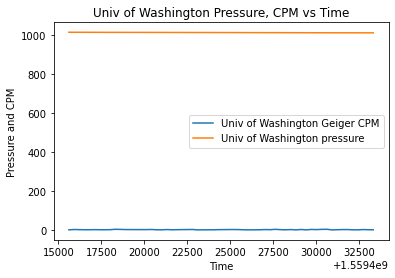

The mean of the University of Washington for pressure is  1013.9973333333334 +/- 31.843324784534254
The standard deviation is  0.8863461826823437


In [145]:
plt.plot(univWashCPM_cut['deviceTime_unix'], univWashCPM_cut['cpm'],label = "Univ of Washington Geiger CPM")
plt.plot(univWashWeather_cut['deviceTime_unix'],univWashWeather_cut['pressure'],label = "Univ of Washington pressure")
plt.ylabel('Pressure and CPM')
plt.xlabel('Time')
plt.title("Univ of Washington Pressure, CPM vs Time")
plt.legend()
plt.show()
univWashWeatherPressure_mean = np.mean(univWashWeather_cut['pressure'])
univWashWeatherPressure_unc = np.sqrt(univWashWeatherPressure_mean)
univWashWeatherPressure_std_unc = univWashWeatherPressure_unc/ np.sqrt(2* len(univWashWeather_cut['pressure']))
univWashWeatherPressure_std = np.std(univWashWeather_cut['pressure'])
print("The mean of the University of Washington for pressure is ", univWashWeatherPressure_mean, '+/-', univWashWeatherPressure_unc)
print("The standard deviation is ", univWashWeatherPressure_std)

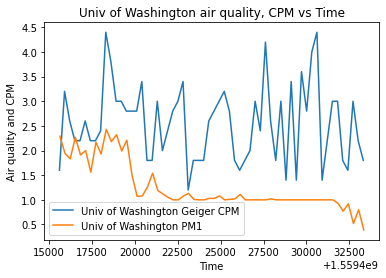

The mean of the University of Washington for air quality for PM1 is  1.2614999999999996 +/- 1.1231651704001506
The standard deviation is  0.485982938658001


In [146]:
plt.plot(univWashCPM_cut['deviceTime_unix'], univWashCPM_cut['cpm'],label = "Univ of Washington Geiger CPM")
plt.plot(univWashAQ_cut['deviceTime_unix'],univWashAQ_cut['PM1'],label = "Univ of Washington PM1")
plt.ylabel('Air quality and CPM')
plt.xlabel('Time')
plt.title("Univ of Washington air quality, CPM vs Time")
plt.legend()
plt.show()
univWashAQ1_mean = np.mean(univWashAQ_cut['PM1'])
univWashAQ1_unc = np.sqrt(univWashAQ1_mean)
univWashAQ1_std_unc = univWashAQ1_unc/ np.sqrt(2* len(univWashAQ_cut['PM1']))
univWashAQ1_std = np.std(univWashAQ_cut['PM1'])
print("The mean of the University of Washington for air quality for PM1 is ", univWashAQ1_mean, '+/-', univWashAQ1_unc)
print("The standard deviation is ", univWashAQ1_std)

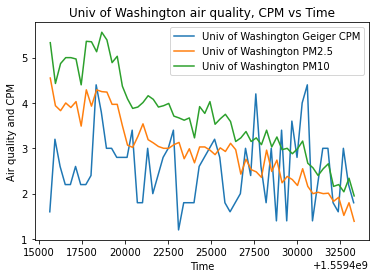

The mean of the University of Washington for air quality for PM2.5 is  2.9673333333333343 +/- 1.7225949417472857
The standard deviation is  0.7571148452440285
The mean of the University of Washington for air quality for PM10 is  3.710333333333333 +/- 1.9262225555042525
The standard deviation is  0.9336790431168279


In [152]:
plt.plot(univWashCPM_cut['deviceTime_unix'], univWashCPM_cut['cpm'],label = "Univ of Washington Geiger CPM")
plt.plot(univWashAQ_cut['deviceTime_unix'],univWashAQ_cut['PM25'],label = "Univ of Washington PM2.5")
plt.plot(univWashAQ_cut['deviceTime_unix'],univWashAQ_cut['PM10'],label = "Univ of Washington PM10")
plt.ylabel('Air quality and CPM')
plt.xlabel('Time')
plt.title("Univ of Washington air quality, CPM vs Time")
plt.legend()
plt.show()
univWashAQ25_mean = np.mean(univWashAQ_cut['PM25'])
univWashAQ25_unc = np.sqrt(univWashAQ25_mean)
univWashAQ25_std_unc = univWashAQ25_unc/ np.sqrt(2* len(univWashAQ_cut['PM25']))
univWashAQ25_std = np.std(univWashAQ_cut['PM25'])
univWashAQ10_mean = np.mean(univWashAQ_cut['PM10'])
univWashAQ10_unc = np.sqrt(univWashAQ10_mean)
univWashAQ10_std_unc = univWashAQ10_unc/ np.sqrt(2* len(univWashAQ_cut['PM10']))
univWashAQ10_std = np.std(univWashAQ_cut['PM10'])
print("The mean of the University of Washington for air quality for PM2.5 is ", univWashAQ25_mean, '+/-', univWashAQ25_unc)
print("The standard deviation is ", univWashAQ25_std)
print("The mean of the University of Washington for air quality for PM10 is ", univWashAQ10_mean, '+/-', univWashAQ10_unc)
print("The standard deviation is ", univWashAQ10_std)

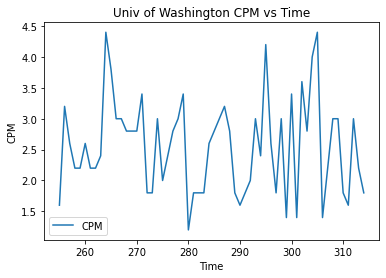

The mean of the University of Washington for radiation for cpm is  2.56 +/- 1.6
The standard deviation is  0.7675067860720624


In [150]:
plt.plot(univWashCPM_cut['cpm'], label = "CPM")
plt.ylabel('CPM')
plt.xlabel('Time')
plt.title('Univ of Washington CPM vs Time')
plt.legend()
plt.show()
univWashCPM_mean = np.mean(univWashCPM_cut['cpm'])
univWashCPM_unc = np.sqrt(univWashCPM_mean)
univWashCPM_std_unc = univWashCPM_unc/ np.sqrt(2* len(univWashCPM_cut['cpm']))
univWashCPM_std = np.std(univWashCPM_cut['cpm'])
print("The mean of the University of Washington for radiation for cpm is ", univWashCPM_mean, '+/-', univWashCPM_unc)
print("The standard deviation is ", univWashCPM_std)

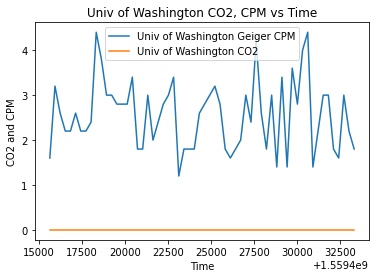

The mean of the University of Washington for CO2 is  0.0 +/- 0.0
The standard deviation is  0.0


In [154]:
plt.plot(univWashCPM_cut['deviceTime_unix'], univWashCPM_cut['cpm'],label = "Univ of Washington Geiger CPM")
plt.plot(univWashCO2_cut['deviceTime_unix'],univWashCO2_cut['co2_ppm'],label = "Univ of Washington CO2")
plt.ylabel('CO2 and CPM')
plt.xlabel('Time')
plt.title("Univ of Washington CO2, CPM vs Time")
plt.legend()
plt.show()
univWashCO2_mean = np.mean(univWashCO2_cut['co2_ppm'])
univWashCO2_unc = np.sqrt(univWashCO2_mean)
univWashCO2_std_unc = univWashCO2_unc/ np.sqrt(2* len(univWashCO2_cut['co2_ppm']))
univWashCO2_std = np.std(univWashCO2_cut['co2_ppm'])
print("The mean of the University of Washington for CO2 is ", univWashCO2_mean, '+/-', univWashCO2_unc)
print("The standard deviation is ", univWashCO2_std)